## Assignment B5
Implement K-Means clustering/hierarchical clustering on sales_data_sample.csv dataset. 
Determine the number of clusters using the elbow method.

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('sales_data.csv', encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [45]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [46]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [47]:
df.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [48]:
df = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

In [49]:
df.nunique()

SALES              2763
QUANTITYORDERED      58
PRICEEACH          1016
dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

In [51]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

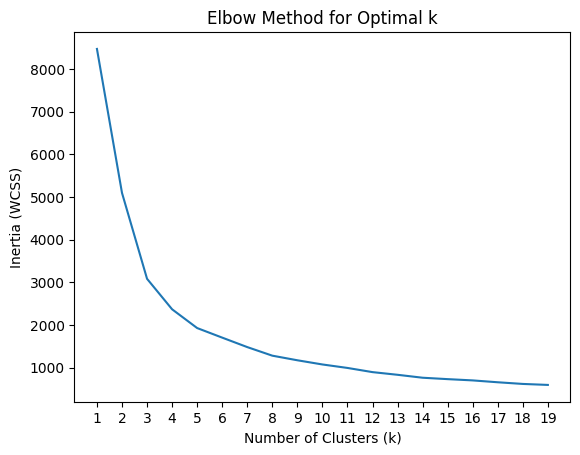

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(y=inertia, x=K, markers='o')
plt.xticks(K)
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.show()

In [55]:
optimal_k = 8

from sklearn.cluster import KMeans

model = KMeans(n_clusters=optimal_k, random_state=42)
model.fit(X_scaled)

df['class'] = model.predict(X_scaled)
df.head()

,SALES,QUANTITYORDERED,PRICEEACH,class
0,2871.00,30,95.70,2
1,2765.90,34,81.35,5
2,3884.34,41,94.74,3
3,3746.70,45,83.26,6
4,5205.27,49,100.00,1


In [56]:
model.cluster_centers_

array([[-1.22990716, -0.83090801, -1.77475245],
       [ 1.05222135,  0.81994466,  0.78528521],
       [-0.37021883, -1.17237785,  0.7171587 ],
       [ 0.22166074, -0.1967798 ,  0.706584  ],
       [ 2.51578781,  1.41150728,  0.79844202],
       [-0.84184034, -0.77046145, -0.54408198],
       [-0.09689219,  0.95112478, -0.36780006],
       [-0.79060181,  0.73381914, -1.6757589 ]])

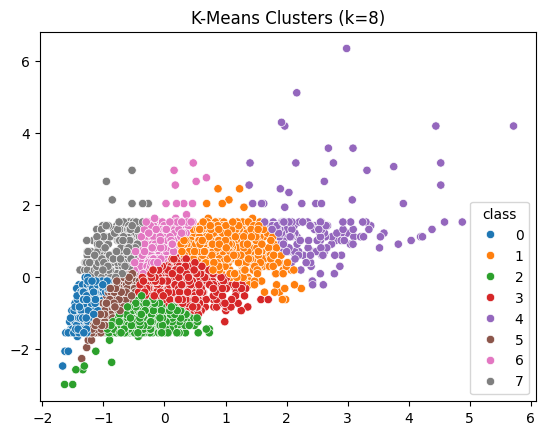

In [57]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['class'], palette='tab10')
plt.title("K-Means Clusters (k=8)")
plt.show()